<a href="https://colab.research.google.com/github/Aditi31kapil/BharatIntern/blob/main/cats_vs_dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:05<00:00, 237MB/s]
100% 1.06G/1.06G [00:05<00:00, 213MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
  image = tf.cast(image/225. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.5687 - accuracy: 0.5815 - val_loss: 0.6510 - val_accuracy: 0.6282
Epoch 2/10
625/625 [==============================] - 84s 133ms/step - loss: 0.5930 - accuracy: 0.6862 - val_loss: 0.7135 - val_accuracy: 0.5596
Epoch 3/10
625/625 [==============================] - 81s 129ms/step - loss: 0.5188 - accuracy: 0.7431 - val_loss: 0.4962 - val_accuracy: 0.7598
Epoch 4/10
625/625 [==============================] - 76s 121ms/step - loss: 0.4402 - accuracy: 0.7962 - val_loss: 0.6022 - val_accuracy: 0.7084
Epoch 5/10
625/625 [==============================] - 77s 123ms/step - loss: 0.3858 - accuracy: 0.8273 - val_loss: 0.4299 - val_accuracy: 0.8046
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3308 - accuracy: 0.8572 - val_loss: 0.5419 - val_accuracy: 0.7316
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2421 - accuracy: 0.9005 - val_loss: 0.5418 - val_ac

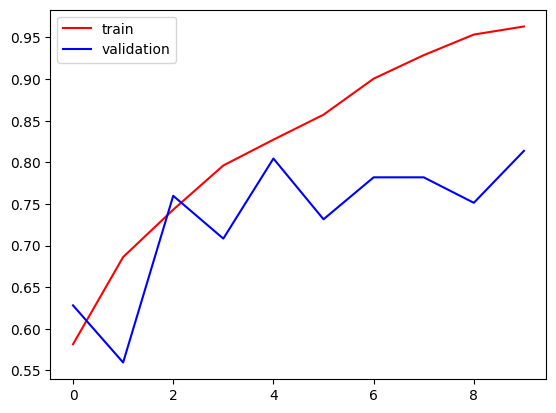

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

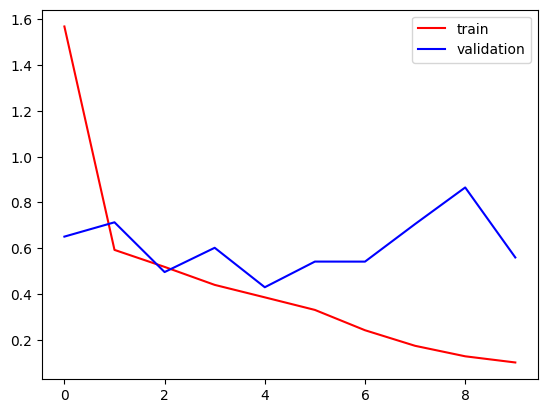

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting
# Dropout
# Batch Norm

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

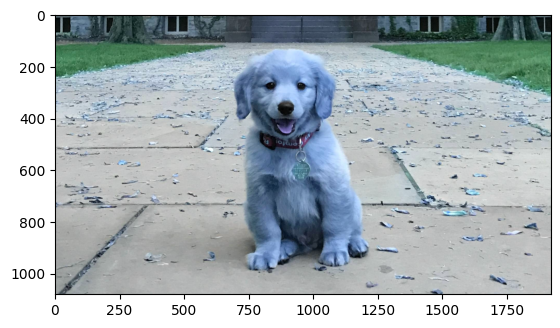

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1080, 1920, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)
if (model.predict(test_input)==1):
  print("Dog")
else:
  print("cat")

1/1 [==============================] - 0s 18ms/step
Dog


(734, 1200, 3)

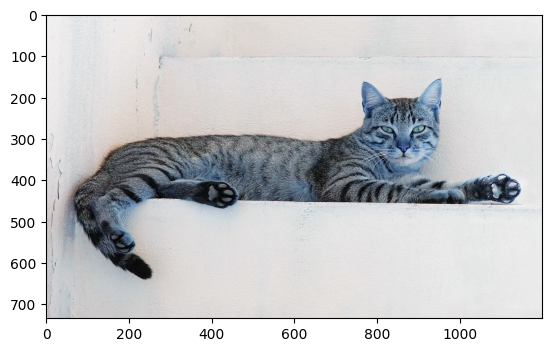

In [ ]:
test2_img = cv2.imread('/content/cat.webp')
plt.imshow(test2_img)
test2_img.shape

In [ ]:
test2_img = cv2.resize(test2_img,(256,256))

In [ ]:
test2_input = test2_img.reshape((1,256,256,3))

In [ ]:
model.predict(test2_input)
if (model.predict(test2_input)==1):
  print("Dog")
else:
  print("cat")

1/1 [==============================] - 0s 17ms/step
cat
